In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
#load trained weight
with open("bimodal.p", "rb") as input_file:
    e = pickle.load(input_file)

w, c, w_o = e[0], e[1], e[2]

In [3]:
#define global constant
p = 20 #parallel runs
N = 5000 #steps per run
R = 31 #no. bins + 1
delta_t = 1e-3 #discretization of time
tau = 0.02 #membrane potential
hist_min = -2.0 #histogram range
hist_max = 2.0
mode_loc = [-1,1] #double mode Gaussian
mode_std = 0.2 #std in each mode

In [4]:
def target_density_bimodal(x,mode_loc, mode_std):
    mode_1 = 1/(2*np.pi)**0.5/mode_std*np.exp(-1/2/(mode_std**2)*(x - mode_loc[0])**2)
    mode_2 = 1/(2*np.pi)**0.5/mode_std*np.exp(-1/2/(mode_std**2)*(x - mode_loc[1])**2)
    return (mode_1 + mode_2)/2

In [6]:
def network(c,w,w_o):
    r = np.random.randn(12,p)
    s = np.zeros((N*20,12,p))
    for i in range(N*20):
        r = r + delta_t * (-r + np.tanh(w@r))/tau+ (2/tau)**0.5*delta_t**0.5*c@np.random.randn(12,p)
        s[i] = r
    return s

In [7]:
def forward(c,w,w_o):
    r = np.random.randn(12,p)
    s = np.zeros((p,N*20))
    for i in range(N*20):
        r = r + delta_t * (-r + np.tanh(w@r))/tau+ (2/tau)**0.5*delta_t**0.5*c@np.random.randn(12,p)
        s[:,i] = w_o@r
    return s

In [8]:
samples = forward(c,w,w_o)

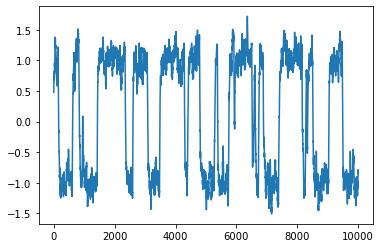

In [9]:
plt.plot(samples[0, 10000: 20000])

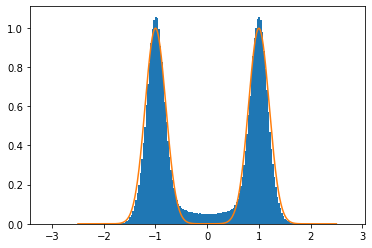

In [10]:
plt.hist(np.sort(samples.reshape(-1))[12:-12], bins = 200, density = True)
plt.plot(np.linspace(-2.5,2.5,1000),target_density_bimodal(np.linspace(-2.5,2.5,1000),mode_loc, mode_std))
plt.show()

In [11]:
activity_array = network(c,w,w_o)

In [12]:
var_array = np.zeros((12,12))
for i in range(p):
    var_array = var_array + activity_array[:,:,i].T @ activity_array[:,:,i]

var_array = var_array/(p*N*20)

[4.78129246e+01 3.93306946e+01 2.58637158e+01 1.85969699e+01
 1.01889206e+01 8.94322729e+00 6.23493272e+00 2.29068866e+00
 1.39816694e+00 5.04992234e-01 2.61579369e-02 1.74572988e-01]


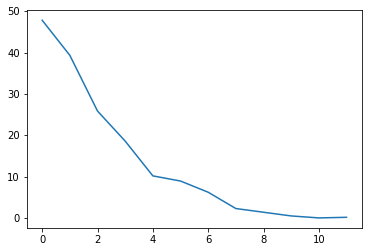

In [13]:
lamda = np.linalg.eig(var_array)[0]
plt.plot(lamda)
print(lamda)